# Freefall

This sample uses [bacon-poly2](https://github.com/Haishi2016/bacon-net/) to rediscover the freefall formula: 

![freefall](https://github.com/Haishi2016/bacon-net/raw/main/images/freefall.png)

In [3]:
from bacon import dataCreator
from nets.poly2 import poly2
import numpy as np

In [2]:
# Create a new instance of Bacon-Poly2 network
net = poly2()

To train the network, you'll need a dataset with three columns: input a, input b, and expected output. Bacon-Net comes with a `dataCreator` utility that can help you to create such a dataset using a lambda expression you provide. The method also takes an optional `singleVariable` parameter. When set, the input b colum is populated with zeros.

In [6]:
# generate 1000 data entries, scaled to [0,1], with lambda y = 1/2Gx^2 G=9.81
a, b, y = dataCreator.create(1000, 1, lambda a, b: 0.5 * 9.81 * a * a, singleVariable=True)


In [7]:
# OPTIONAL: print out the dataset
print(np.column_stack((a,b,y)))

[[7.31495810e-01 0.00000000e+00 2.67543060e-01]
 [7.64105243e-01 0.00000000e+00 2.91928411e-01]
 [9.24284193e-01 0.00000000e+00 4.27150635e-01]
 ...
 [8.81493988e-02 0.00000000e+00 3.88515826e-03]
 [4.03804925e-02 0.00000000e+00 8.15292085e-04]
 [7.75334982e-01 0.00000000e+00 3.00572167e-01]]


In [8]:
# Train the network
history = net.fit(a,b,y)

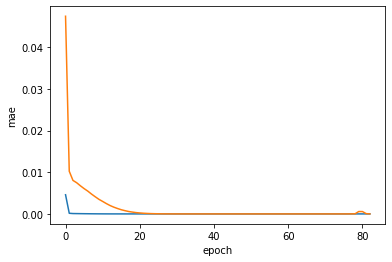

In [9]:
# OPTIONAL: Plot learning history. Bacon-Net does early stopping after no improvements after 10 iterations
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['mae'])
plt.ylabel('mae')
plt.xlabel('epoch')
plt.show()

In [10]:
# Explain the network
m = net.explain(singleVariable=True)
print(m)

z = 0.5x^2


Congratulations! You've just re-discovered the freefall formula!

In [11]:
# OPTIONAL: Use the network to make predictions
y = net.predict(1)
print(y)

0.50000244


In [12]:
# OPTIONAL: Run prediction on an array
y = net.predict([1,2,3,4,5])
print(y)

[ 0.50000244  2.0000029   4.500003    8.000002   12.500002  ]


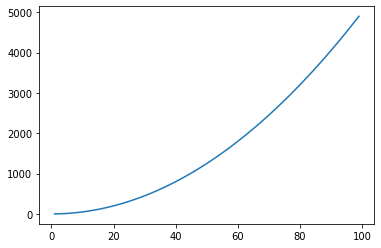

In [18]:
# OPTIONAL: Plot the function
x = np.arange(1,100,1).tolist()
y = net.predict(x)
plt.plot(x, y)
plt.show()